In [ ]:
pip install pandas numpy scikit-learn matplotlib seaborn


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Step 1: Load the Dataset
print("Please upload your dataset (e.g., new-dataset.xlsx).")
uploaded = files.upload()  # Prompt for file upload

# Validate file upload and load dataset
if uploaded:
    file_path = list(uploaded.keys())[0]  # Get the uploaded file name
    print(f"Dataset '{file_path}' uploaded successfully!")
    try:
        data = pd.read_excel(file_path, sheet_name=0)  # Load the first sheet of the Excel file
        print("Dataset loaded successfully!")
    except Exception as e:
        print(f"Error loading dataset: {e}")
        raise
else:
    print("No file uploaded. Please try again.")
    raise FileNotFoundError("Dataset upload required.")



Please upload your dataset (e.g., new-dataset.xlsx).


Saving New-Dataset.xlsx to New-Dataset.xlsx
Dataset 'New-Dataset.xlsx' uploaded successfully!
Dataset loaded successfully!


In [ ]:
# Step 2: Exploratory Data Analysis (EDA)
print("\nDataset Overview:")
print("Shape:", data.shape)
print(data.info())
print("\nColumns in the dataset:", data.columns)
print("\nClass Distribution:\n", data['isFraud'].value_counts())  # Corrected column name



Dataset Overview:
Shape: (3999, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            3999 non-null   int64  
 1   type            3999 non-null   object 
 2   amount          3999 non-null   float64
 3   nameOrig        3999 non-null   object 
 4   oldbalanceOrg   3999 non-null   float64
 5   newbalanceOrig  3999 non-null   float64
 6   nameDest        3999 non-null   object 
 7   oldbalanceDest  3999 non-null   float64
 8   newbalanceDest  3999 non-null   float64
 9   isFraud         3999 non-null   int64  
 10  isFlaggedFraud  3999 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 343.8+ KB
None

Columns in the dataset: Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
     

In [ ]:
# Step 3: Data Preprocessing
# Handle categorical variables (e.g., one-hot encoding)
print("\nProcessing categorical variables...")

# Strip any extra spaces from column names to avoid issues
data.columns = data.columns.str.strip()

# Verify that the columns exist in the dataset
print("\nColumns in the dataset:", data.columns)

# Apply one-hot encoding to the 'type', 'nameOrig', and 'nameDest' columns
categorical_columns = ['type', 'nameOrig', 'nameDest']  # Columns identified in the dataset
if all(col in data.columns for col in categorical_columns):
    data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
else:
    print("Error: One or more categorical columns are missing. Check the column names.")

# Scale numerical features
print("Scaling numerical features...")
scaler = StandardScaler()

# List of numerical features for scaling
numerical_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Separate features (X) and target (y)
X = data.drop('isFraud', axis=1)  # Correct target column
y = data['isFraud']  # Correct target column
print("Features and target separated.")



Processing categorical variables...

Columns in the dataset: Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'type_CASH_OUT',
       'type_DEBIT',
       ...
       'nameDest_M991671211', 'nameDest_M992457879', 'nameDest_M992893965',
       'nameDest_M993208674', 'nameDest_M996533593', 'nameDest_M997294994',
       'nameDest_M99808631', 'nameDest_M998283025', 'nameDest_M998458782',
       'nameDest_M999221400'],
      dtype='object', length=6430)
Error: One or more categorical columns are missing. Check the column names.
Scaling numerical features...
Features and target separated.


In [ ]:
# Step 4: Train-Test Split
print("\nSplitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Training and testing sets created.")


Splitting data into training and testing sets...
Training and testing sets created.


In [ ]:
# Step 5: Handle Class Imbalance
print("\nBalancing class distribution using SMOTE...")
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
print("Class distribution after SMOTE:\n", pd.Series(y_train).value_counts())


Balancing class distribution using SMOTE...
Class distribution after SMOTE:
 isFraud
0    3180
1    3180
Name: count, dtype: int64


In [ ]:
# Step 6: Train the Model
print("\nTraining Random Forest model...")
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
print("Model trained successfully!")


Training Random Forest model...
Model trained successfully!



Evaluating the model...

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       795
           1       0.00      0.00      0.00         5

    accuracy                           0.99       800
   macro avg       0.50      0.50      0.50       800
weighted avg       0.99      0.99      0.99       800

AUC-ROC Score: 0.989937106918239


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


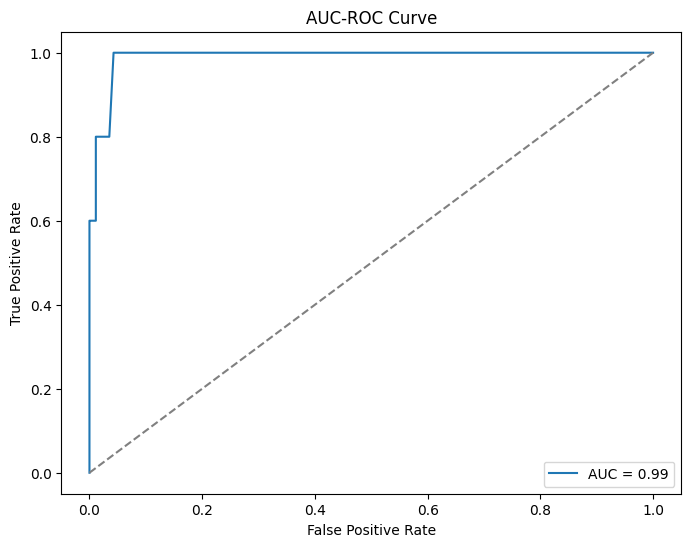

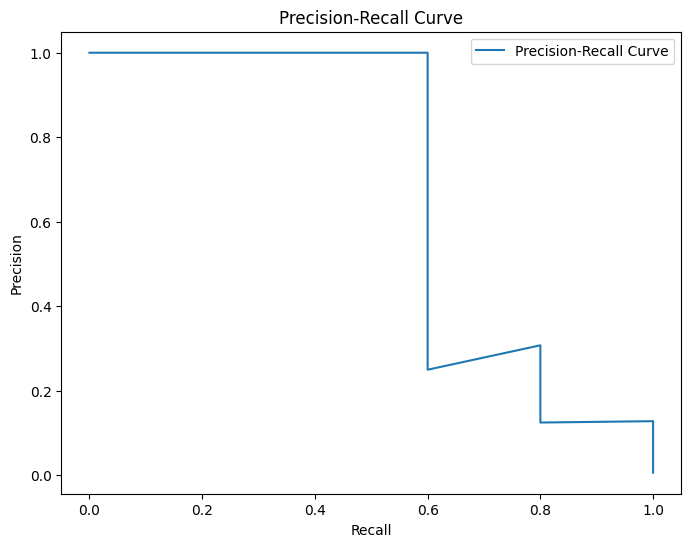

In [ ]:
# Step 7: Evaluate the Model
print("\nEvaluating the model...")
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# AUC-ROC Score
auc_score = roc_auc_score(y_test, y_proba)
print("AUC-ROC Score:", auc_score)

# Plot AUC-ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend()
plt.show()

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [ ]:
# Step 8: Save Predictions for Tableau
print("\nSaving predictions for Tableau...")
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Probability': y_proba
})
results.to_csv("model_predictions.csv", index=False)
print("Predictions saved as 'model_predictions.csv'.")

# Download predictions file
files.download("model_predictions.csv")


Saving predictions for Tableau...
Predictions saved as 'model_predictions.csv'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Analyzing feature importance...


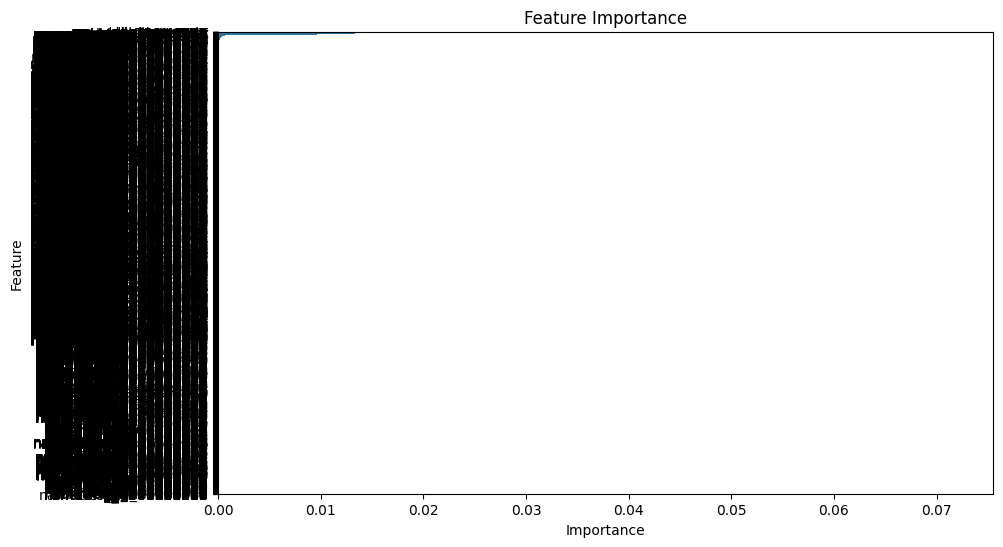


Process complete!


In [ ]:
# Step 9: Feature Importance (Optional)
print("\nAnalyzing feature importance...")
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

print("\nProcess complete!")